# Likelihood primer

These are some quick exercises to familiarize yourself with the frequentist characteristic of the Maximum Likelihood Estimator.

First some setup. We import what we need from this package plus matplotlib for plotting:

In [1]:
# Load the software ("import the module" in python jargon)

from fermi_school_like import *

# Import matplotlib for plotting
from matplotlib import pyplot as plt

# This show the plots inline in the notebook

%matplotlib inline

# Setup our generative process

Let's setup the process which will generate the simulated data we will use:

In [2]:
# Define number of bins in our data

n_bins = 100

# Generate bins in x
bin_boundaries = np.linspace(1,100,100)
bins = Bins(bin_boundaries)

print(bins.boundaries)

[   1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.
   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.   24.
   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.
   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.   48.
   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.   60.
   61.   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.   72.
   73.   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.   84.
   85.   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.   96.
   97.   98.   99.  100.]


In [3]:
# Create a generative model (just a simple line ax + b)
# Define its coefficients

a_true = 3.0

true_signal = Constant(a_true)

# Use it as generative process

data_generative_process = DataGenerativeProcess(true_signal)

# Likelihood analysis

Let's perform a likelihood analysis:

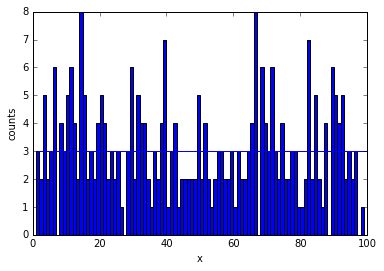

In [4]:
# Prepare a likelihood analysis 

# First we need data. Since this is an exercise, let's get the data
# from the generative model defined above.

# For each bin this generates a random number from a Poisson distribution
# with the average given by the integral of the model over the bins

data = data_generative_process.generate(bins)

# Let's plot the data

plt.bar(bins.centers, data, width = bins.widths, align='center')
plt.xlabel("x")
plt.ylabel("counts")

# Plot also the generative model
plt.plot(bins.centers, true_signal(bins.centers))

In [5]:
# Then we need to assume a model. In this case we know that it
# must be a line. Let's start from values close but not quite
# like the true value (which in a real analysis we wouldn't know)

a = 2.5
model = Constant(a)

# Then we need to decide a noise model
noise_model = 'Poisson'

# Now we can create a Likelihood analysis and perform
# its maximization

like = Likelihood(bins, data, model, noise_model)

# Find the Maximum Likelihood Estimate for our parameter:

a_mle = like.maximize()

# Print the MLE estimate. It should be close enough (but not exact. why?)

print("MLE estimate for a: %.3f " % a_mle)

MLE estimate for a: 3.000 


## Bias

Here we show that the MLE estimator is unbiased, i.e., that the expected value for the MLE estimate for a parameter is the true value. The expected value is the average over many (-> inf) observations of the same process.

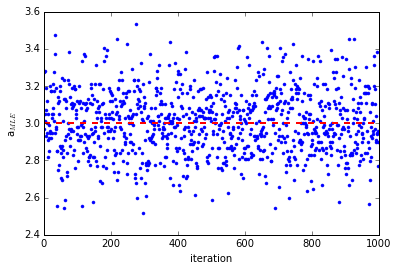

In [6]:
# Now repeat the whole analysis (from data generation on) a certain number of times

# I prepared a convenience function to do that. 
# This function regenerates some data from the same generative process
# used above, then it fits them and returns the list of MLE estimates
# for a (one for each iteration)
# Let's do it 1000 times

many_a_mle = like.generate_and_fit(data_generative_process, 1000)

# Now let's plot the MLEs for a

plt.plot(many_a_mle,'.')
plt.ylabel(r"a$_{MLE}$")
plt.xlabel("iteration")

# Plot the true value
plt.axhline(a_true, color='red',lw=2,linestyle='--')

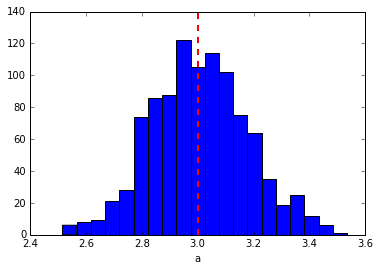

In [7]:
# We can make an histogram of the MLE estimates
histogram = plt.hist(many_a_mle, 20)
plt.xlabel("a")
# plot the vertical like of the true value
plt.axvline(a_true, color='red', lw=2, linestyle='--', zorder=100)

The fact that the average the MLE value approaches the true value when the number of observations increases means that the MLE estimator is unbiased.

This is not obvious. To show that, let's see an example of a biased estimator:

(1.7805987984625393, 3.3000000000000003)

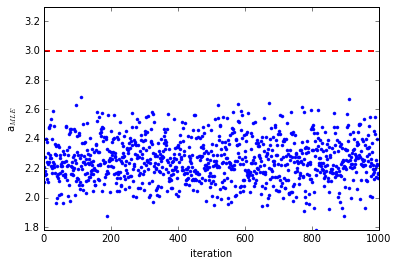

In [8]:
# If you want an example of a biased estimator, let's use chi square
# in this case. 
# As shown in the presentation, maximizing a likelihood with a
# Gaussian noise model is equivalent to minimize chi square
like.noise_model = 'gaussian'

many_a_mle_chi = like.generate_and_fit(data_generative_process, 1000)

# Now let's plot for example the maximum estimates for a

plt.plot(many_a_mle_chi,'.')
plt.ylabel(r"a$_{MLE}$")
plt.xlabel("iteration")

# Plot the true value
plt.axhline(a_true, color='red',lw=2,linestyle='--')

# Let's adjust the y range to include the points and the
# true value
plt.ylim([many_a_mle_chi.min(), a_true * 1.1])

(1.7805987984625393, 3.3000000000000003)

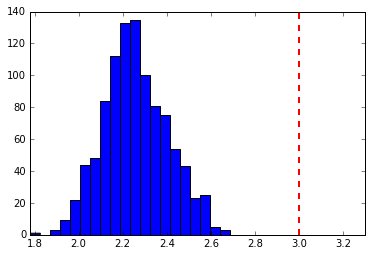

In [9]:
histogram = plt.hist(many_a_mle_chi, 20)

# plot the vertical like of the true value
plt.axvline(a_true, color='red', lw=2, linestyle='--', zorder=100)

# Adjust the x range to include the true value
plt.xlim([many_a_mle_chi.min(), a_true * 1.1])

$\chi^2$ is biased in this case because it assumes the wrong noise model (gaussian) while our data have Poisson noise. If you were to use a larger value for a_true, then the situation will get better until the $\chi^2$ minimization would work as good as the Poisson likelihood maximization. The reason is that for large $n$ the Poisson distribution approaches the Gaussian distribution with $\sigma = \sqrt{n}$.

# The Maximum Likelihood estimator is consistent

Consistent means that we can measure the unknown quantity up to an arbitrary precision level if we can increase the amount of data sufficiently.

To see that, let's try to repeat the procedure we did in the previous section with a variable amount of data:

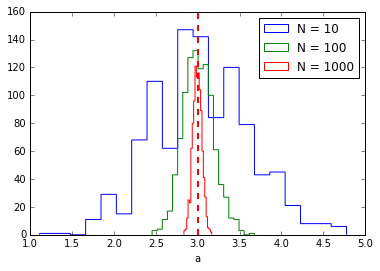

In [10]:
# Let's generate the model with a variable quantity of data

n_bins_to_try = [10,100,1000]

for n_bins in n_bins_to_try:

    # Generate number of bins in x 
    # (NOTE: we are generating n_bins bins from 0 to n_bins)

    bin_boundaries = np.linspace(1, n_bins, n_bins)

    bins = Bins(bin_boundaries)
    data = data_generative_process.generate(bins)

    like = Likelihood(bins, data, model, 'poisson')

    this_a_mle = like.generate_and_fit(data_generative_process, 1000)

    # We can make an histogram of the MLE estimates
    histogram = plt.hist(this_a_mle, 20, label='N = %i' % n_bins, histtype='step')
    plt.xlabel("a")

# plot the vertical like of the true value
plt.axvline(a_true, color='red', lw=2, linestyle='--', zorder=100)

plt.legend()

# Errors on the Maximum Likelihood estimate

We have seen in the previous section that the average MLE estimate is close to the true value, and becomes closer and closer as the amount of data increases.

However the MLE estimate on a single dataset will be different from the true value, and might be distant from it.

Also, in reality we cannot usually re-generate the data that we have. In Astronomy in particular many times we have observed an event which will never repeat itself. So we cannot really produce histograms like the ones we produced before, because we have only one measurement.

We need to introduce an error measurement. Before doing that, let's see what a likelihood profile is:

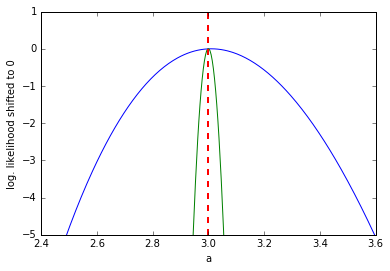

In [11]:
# Let's prepare a grid in possible values for a,
# between the 80% and 120% of the true value
# (this is arbitrary)

a_s = np.linspace(a_true * 0.8, a_true * 1.2,300)

# Let's generate data and fit them
# Let's use a small quantity of data first

n_bins1 = 100

bin_boundaries1 = np.linspace(1,n_bins1,n_bins1)
bins1 = Bins(bin_boundaries1)
data1 = data_generative_process.generate(bins1)

like1 = Likelihood(bins1, data1, model, 'poisson')
a_mle1 = like1.maximize()

# This goes through all the a_s values and for each a compute
# L(D|a)

profile1 = like1.profile(a_s)

# Now let's do the same for a larger quantity of data

n_bins2 = 10000

bin_boundaries2 = np.linspace(1,n_bins2, n_bins2)
bins2 = Bins(bin_boundaries2)
data2 = data_generative_process.generate(bins2)

like2 = Likelihood(bins2, data2, model, 'poisson')
a_mle2 = like2.maximize()

profile2 = like2.profile(a_s)

plt.plot(a_s, profile1 - profile1.max(), label='Few data')
plt.plot(a_s, profile2 - profile2.max(), label='Many data')
plt.xlabel("a")
plt.ylabel("log. likelihood shifted to 0")
plt.ylim([-5,1])
plt.axvline(a_true, linestyle='--',lw=2, color='red')

We see that the likelihood profile for the case where we have fewer data is much broader than the profile for the likelihood for the case of a larger quantity of data.

This goes in parallel to what we have seen in the previous section, where the case with fewer data produced a larger distribution of estimates than the case with more data.

This means that the estimate in the case of a larger quantity of data is less uncertain than in the case with fewer data, and the broadness of the likelihood profile is linked to this uncertainty.

Based on this intuition, we can actually build confidence intervals based on the shape of the profile of the likelihood.

There is a theorem ("Wilks' theorem") which tells us that the following quantity:

$$
2~\log{\left( \frac{L(D|a_{MLE})}{L(D|a)} \right)}
$$

is distributed as $\chi^2$ with 1 degrees of freedom (if the amount of data is large enough). 

$L(D|a_{MLE})$ is the value of the likelihood at the MLE estimate (null hypothesis), while $L(D|a)$ is the likelihood value at some other value $a$.

So we can build a confidence interval which includes all the values $a$ around $a_{MLE}$ for which we ~cannot~ exclude the null-hypothesis at the $\alpha$ confidence levels.

Practically then, we need to find the values of $a$ on each side of $a_{MLE}$ for which the likelihood changes by more than a given quota, given by the $100~(1-\alpha)$ percentile of the $\chi^2$ distribution with 1 d.o.f., where $\alpha$ is the required confidence level. For $\alpha = 0.68$ ("1-sigma error") the delta is 0.5.

(NOTE: if the model has more than one parameter, if we want to compute errors on each parameter, we need to consider them one at the time and we need to compute the profile likelihood. Let's say we have two parameters $(a,b)$, and we are computing the error on $a$. Then we scan the likelihood for different values $a_k$, and for each one of them we maximize the likelihood keeping $a_k$ fixed, and then we record the value obtained from this fit.)

This sounds complicate, but it's not. Let's replot the likelihood profiles we just found, which we shifted to have the maximum at 0. Then we need to find the values for the parameter where the likelihood profile intersects an horizontal line at -0.5. This is what the get_errors() method does:

(2.719367160426525, 3.312282021823481)

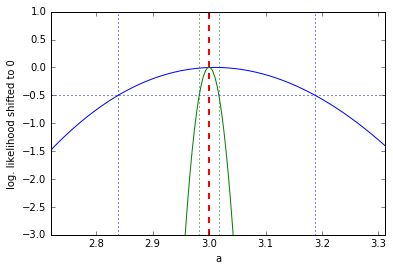

In [12]:
# Let's find the values for which the likelihood changes by 0.5
# with respect to its maximum

negative_error1, positive_error1 = like1.get_errors(a_mle1)

negative_error2, positive_error2 = like2.get_errors(a_mle2)

# Let's replot the profiles

plt.plot(a_s, profile1 - profile1.max(), label='Few data')
plt.plot(a_s, profile2 - profile2.max(), label='Many data')
plt.xlabel("a")
plt.ylabel("log. likelihood shifted to 0")
plt.axvline(a_true, linestyle='--',lw=2, color='red')

# This is the horizontal line at -0.5
plt.axhline(-0.5, linestyle=':')

# Now plot the errors we have found, corresponding to the intersection
# between the profiles and the horizontal line at -0.5

plt.axvline(a_mle1 + negative_error1, color='blue',linestyle=':')
plt.axvline(a_mle1 + positive_error1, color='blue',linestyle=':')

plt.axvline(a_mle2 + negative_error2, color='green',linestyle=':')
plt.axvline(a_mle2 + positive_error2, color='green',linestyle=':')

# Let's adjust the limit of the plot to zoom in
plt.ylim([-3,1])
plt.xlim([a_mle1 + negative_error1 * 1.7, a_mle1 + positive_error1 * 1.7])

## Coverage of confidence interval

Let's define "coverage" of a confidence interval the fraction of times when the confidence interval truly contains the true value. This coverage should be equal to the confidence level chosen for the confidence interval.

We use 68% confidence intervals, so coverage should be close to 0.68:

Fraction of simulations for which the 68 c.l. interval actually contains the true value: 0.69


(1.8111593826980348, 4.4981389872338422)

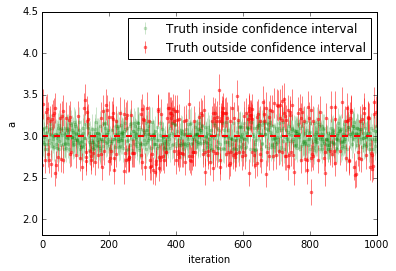

In [13]:
# Check the coverage of the confidence intervals produced with the likelihood profile
# technique
# The fraction of simulations when the interval contains the true value should be equal to the confidence
# level

# Go back to the small dataset
n_bins = 100

bin_boundaries = np.linspace(1,100,n_bins)
bins = Bins(bin_boundaries)
data = data_generative_process.generate(bins)

like = Likelihood(bins, data, model, 'poisson')
a_mle = like1.maximize()

# Number of simulations
n_sims = 1000

a_mles, a_mle_errors = like.generate_and_fit(data_generative_process, n_sims, compute_errors=True)

# Keep track of how many times the true value is inside the
# confidence interval, and which one are inside

n_inside = 0
inside = np.zeros(n_sims,bool)

# Save MLE value, negative and positive errors for easy plotting
mle_estimates = np.zeros(n_sims)

negative_errors = np.zeros(n_sims)
positive_errors = np.zeros(n_sims)

for i in range(n_sims):
    
    a_mle = a_mles[i]
    
    mle_estimates[i] = a_mle
    
    negative_error = a_mle_errors[i][0]
    positive_error = a_mle_errors[i][1]
    
    lower_boundary = a_mle + negative_error
    upper_boundary = a_mle + positive_error
    
    if lower_boundary <= a_true <= upper_boundary:
        
        n_inside += 1
        
        inside[i] = True
    
    # Need to do this because errorbar expects the negative and positive
    # errors in two different lists (or arrays), and the negative error
    # with positive sign (!)
    
    negative_errors[i] = negative_error * -1
    positive_errors[i] = positive_error
    
print("Fraction of simulations for which the 68 c.l. interval actually contains the true value: %.2f" % 
      (n_inside / float(n_sims)))

# Plot in gray all simulations where the true value was inside
plt.errorbar(np.arange(n_sims)[inside],mle_estimates[inside], 
             yerr=[negative_errors[inside], positive_errors[inside]],
             fmt='.', capsize=0, color='green', alpha=0.2,
             label='Truth inside confidence interval')


# replot in red the iterations where the true value
# was outside the confidence interval

outside = ~inside

plt.errorbar(np.arange(n_sims)[outside], mle_estimates[outside], 
             yerr=[negative_errors[outside], positive_errors[outside]],
             fmt='.', capsize=0, color='red',alpha=0.5,
             label='Truth outside confidence interval')

plt.axhline(a_true,color='red',linestyle='--', lw=2)

plt.xlabel("iteration")
plt.ylabel("a")

plt.legend(frameon=True, numpoints=1)
plt.ylim((mle_estimates-negative_errors).min() / 1.2, (mle_estimates+positive_errors).max() * 1.2)

so we see that the coverage is pretty close to the nominal value for this amount of data, and the coverage of the confidence interval is good. Note that this might not be the case for very small datasets!